In [1]:
import arkouda as ak
import arkouda_njit as ar
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

    _         _                   _       
   / \   _ __| | _____  _   _  __| | __ _ 
  / _ \ | '__| |/ / _ \| | | |/ _` |/ _` |
 / ___ \| |  |   < (_) | |_| | (_| | (_| |
/_/   \_\_|  |_|\_\___/ \__,_|\__,_|\__,_|
                                          

Client Version: v2022.08.30+18.g1f24d1f5.dirty


# Introduction to Graph Analytics In Arachne

When it comes to processing graphs in an interactive supercomputing environment, we may have many algorithms available to us and a difficult time picking which one would be the best algorithm for a particular problem at hand. In this section we will give a rundown on each implemented algorithm and how it can be utilized for further analysis.

## Reading in a Graph

For anyone new to graph analytics, we will make it as welcoming as possible. First, let us define a graph. Let $G = (V,E)$ where $V$ is a set of vertices and $E$ is a set of edges with $n = |V|$ vertices and $m = |E|$ edges. A graph can be either directed or undirected, or have weighted vertices or edges or not. Some graph algorithms work independently of vertex or edge weights.

During graph reading, the file should be available for the Chapel back-end to open. This allows for an array to be made in the back end and maintained there without transferring all that data to the front end.

In [2]:
ak.connect("d-6-15-4", 5555)

connected to arkouda server tcp://*:5555


In [3]:
# Read in the graph. 
filename = "/home/gridsan/oarodriguez/biggraph_shared/Adata/simple.txt"
ne = 13 
nv = 10
G = ar.graph_file_read(ne, nv, 2, 0, filename, 1, 0, 0, 0, 1)

13 10 2 0 /home/gridsan/oarodriguez/biggraph_shared/Adata/simple.txt 1 0 0 0 1


In [4]:
# Add the edges of the graph to a list of tuples.
src = ar.graph_query(G, "src")
dst = ar.graph_query(G, "dst")

edges = []
for (u, v) in zip(src.to_ndarray(), dst.to_ndarray()):
    edges.append((u,v))

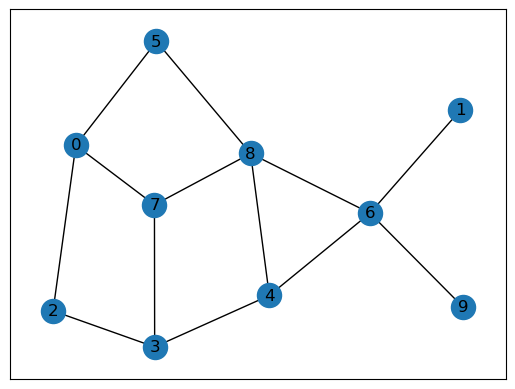

In [5]:
# Display the graph with NetworkX.
nxG = nx.Graph()
nxG.add_edges_from(edges)

pos = nx.spring_layout(nxG, seed=225)
nx.draw_networkx(nxG, pos, with_labels=True)
plt.show()

In [6]:
# Get value of the maximum degree.
neighbour = ar.graph_query(G, "neighbour")
neighbourR = ar.graph_query(G, "neighbourR")
degrees = neighbour + neighbourR
print("The value of the maximum degree is: {}".format(ak.max(degrees)))

The value of the maximum degree is: 4


## Breadth-First Search



In [7]:
d = ar.graph_bfs(G, int(ak.argmax(degrees)), 0)
print(d)

[3 1 3 2 1 2 0 2 1 1]


In [8]:
# Get the size of each level of BFS. 
d_histogram = ak.histogram(d, bins=ak.max(d)+1)
print(d_histogram)

(array([0.  , 0.75, 1.5 , 2.25]), array([1 4 3 2]))


## Connected Components

In [9]:
cc = ar.graph_cc(G)
print(cc)

[1]


In [10]:
# todo: have connected components return the label of what each component belongs to. 
# todo: show analysis on how to select the largest component type. 
# todo: Run bfs on largest component. 
# todo: printout largest component. 

## K-Truss

In [11]:
kt = ar.graph_ktruss(G, 3)
print(kt)

[2 2 2 2 2 -1 2 2 2 2 2 -1 -1]


In [12]:
kt = ar.graph_ktruss(G, -1)
print(kt)

[4 0]


In [13]:
kt = ar.graph_ktruss(G, -2)
print(kt)

[2 2 2 2 2 3 2 2 2 2 2 3 3]


In [14]:
# todo: get more ideas on how to run analysis with ktruss.

## Jaccard Coefficient

In [15]:
jc = ar.graph_jaccard_coefficient(G)
print(jc)

[0.000000e+00]


In [16]:
# todo: get more ideas on how to run analysis with jaccard coefficients.

## Triangle Centrality

In [17]:
tce = ar.graph_tri_ctr(G)
print(tc)

NameError: name 'tc' is not defined

## Triangle Centrality

In [ ]:
# We need to fix the Chapel code for this.